<a href="https://colab.research.google.com/github/Sony-Dodla/b23_1666/blob/main/code(IEEE_PAPER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:36:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.5182481751824818
Precision: 0.5193798449612403
Recall: 0.48905109489051096
F1 Score: 0.5037593984962406
ROC-AUC: 0.5420640417710054

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.55      0.53       137
           1       0.52      0.49      0.50       137

    accuracy                           0.52       274
   macro avg       0.52      0.52      0.52       274
weighted avg       0.52      0.52      0.52       274



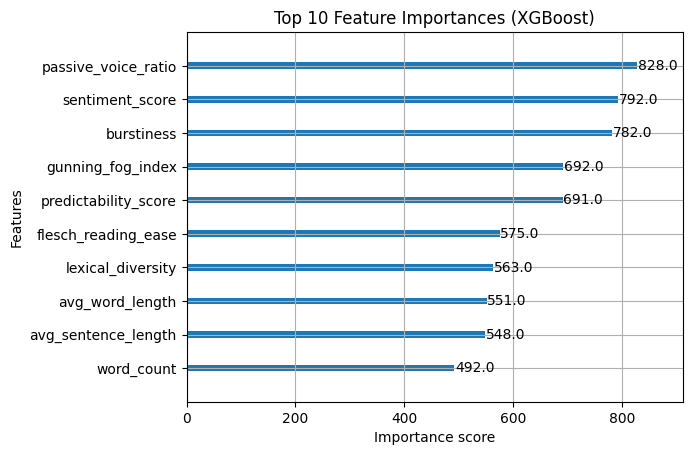

/tmp/ipython-input-39724339.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")


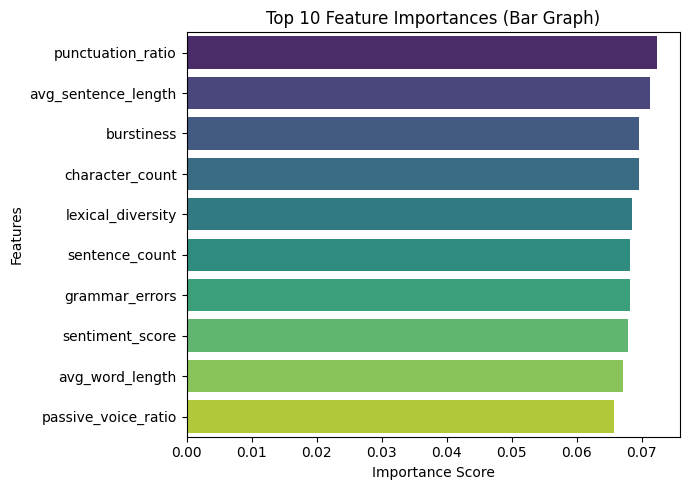


Table II: Performance of XG Boost Classifier

Classifier  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  ROC-AUC (%)
  XG Boost          51.8           51.9        48.9          50.4        54.21


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Load dataset
file_path = "/content/ai_human_content_detection_dataset.csv"
df = pd.read_csv(file_path)

# Drop text_content (raw text not used in this model)
df = df.drop(columns=["text_content"])

# Handle categorical feature: content_type
le = LabelEncoder()
df["content_type"] = le.fit_transform(df["content_type"])

# Handle missing values (fill with median)
df = df.fillna(df.median(numeric_only=True))

# Features and target
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Train
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt
import xgboost as xgb_module

xgb_module.plot_importance(xgb, importance_type="weight", max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()
plt.figure(figsize=(7, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("Top 10 Feature Importances (Bar Graph)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# --- Display Table II (Performance) ---
data = {
    "Classifier": ["XG Boost"],
    "Accuracy (%)": [round(acc, 1)],
    "Precision (%)": [round(prec, 1)],
    "Recall (%)": [round(rec, 1)],
    "F1-Score (%)": [round(f1, 1)],
    "ROC-AUC (%)": [round(roc_auc, 2)]
}

table_df = pd.DataFrame(data)
print("\nTable II: Performance of XG Boost Classifier\n")
print(table_df.to_string(index=False))
